In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

17464789/17464789 [==============================] - 1s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [3]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


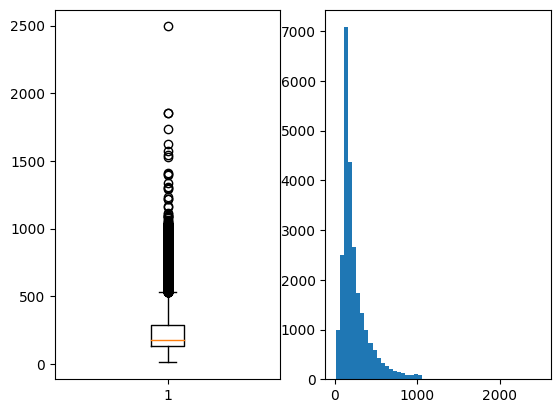

In [4]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length, bins=50)
plt.show()

In [5]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [6]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index] = token

print(' '.join([index_to_word[index] for index in X_train[0]]))

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shoul

In [8]:
import re  #-- 정규표현식을 사용하기 위한 모듈 임포트
from tensorflow.keras.datasets import imdb  #-- IMDB 데이터셋을 로드하기 위한 모듈 임포트
from tensorflow.keras.preprocessing.sequence import pad_sequences  #-- 시퀀스 패딩을 위한 모듈 임포트
from tensorflow.keras.models import Sequential  #-- Sequential 모델을 사용하기 위한 모듈 임포트
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM  #-- 다양한 레이어를 사용하기 위한 모듈 임포트
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  #-- 훈련 중단 및 모델 체크포인트를 위한 모듈 임포트
from tensorflow.keras.models import load_model  #-- 모델 로드를 위한 모듈 임포트

vocab_size = 10000  #-- 사용할 단어의 개수를 지정하는 변수
max_len = 500  #-- 문장의 최대 길이를 지정하는 변수

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
#-- IMDB 데이터셋을 로드하고, num_words를 통해 빈도 기준 상위 vocab_size 개의 단어만 사용하여 데이터를 로드
#-- 훈련 데이터와 테스트 데이터로 구분

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
#-- pad_sequences를 사용하여 시퀀스 데이터인 X_train과 X_test의 길이를 맞춤
#-- maxlen을 통해 문장의 최대 길이를 설정하고, 부족한 길이의 문장은 0으로 패딩

## 모델정의

In [9]:
def rnn_model(): #-- RNN Model
    model = Sequential()  #-- Sequential 모델 생성
    model.add(Embedding(vocab_size, embedding_dim)) #-- Embedding 레이어: 단어 임베딩을 학습하는 역할
    model.add(SimpleRNN(hidden_units)) #-- SimpleRNN 레이어: RNN의 한 종류로, 시계열 데이터 처리에 사용됨
    model.add(Dense(1, activation='sigmoid')) #-- Dense 레이어: 이진 분류를 위한 출력층

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) 
    #---- 과적합을 방지하기 위한 EarlyStopping(조기 종료) 코드
    mc = ModelCheckpoint('rnn_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    #-- 학습 모델을 저장하기 위한 checkpoint 저장

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    #-- 이진분류 문제이므로 binary_crossentropy를 사용하여 모델 컴파일
    history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
    #-- 모델 학습 history 저장
    return model

def lstm_model():
    model = Sequential() #-- LSTM 모델 생성
    model.add(Embedding(vocab_size, embedding_dim)) #-- Embedding 층 추가: 입력 데이터를 임베딩 벡터로 변환
    model.add(LSTM(hidden_units))#-- LSTM 층 추가: LSTM 레이어를 모델에 추가
    model.add(Dense(1, activation='sigmoid'))#-- Dense 층 추가: 이진 분류를 위한 출력층

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    mc = ModelCheckpoint('lstm_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)
    return model

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim  # 임베딩 차원
        self.num_heads = num_heads  # 어텐션 헤드의 개수

        assert embedding_dim % self.num_heads == 0  # 임베딩 차원이 어텐션 헤드의 개수로 나누어 떨어지는지 확인

        self.projection_dim = embedding_dim // num_heads  # 어텐션 헤드 당 차원 크기
        self.query_dense = tf.keras.layers.Dense(embedding_dim)  # 쿼리에 대한 밀집층
        self.key_dense = tf.keras.layers.Dense(embedding_dim)  # 키에 대한 밀집층
        self.value_dense = tf.keras.layers.Dense(embedding_dim)  # 값에 대한 밀집층
        self.dense = tf.keras.layers.Dense(embedding_dim)  # 최종 출력을 위한 밀집층

    def scaled_dot_product_attention(self, query, key, value):  # 스케일된 닷 프로덕트 어텐션 함수
        matmul_qk = tf.matmul(query, key, transpose_b=True)  # 쿼리와 키를 곱함
        depth = tf.cast(tf.shape(key)[-1], tf.float32)  # 스케일링 팩터
        logits = matmul_qk / tf.math.sqrt(depth)  # 스케일링
        attention_weights = tf.nn.softmax(logits, axis=-1)  # 소프트맥스를 적용해 어텐션 가중치를 계산
        output = tf.matmul(attention_weights, value)  # 가중치와 값을 곱해 출력을 계산
        return output, attention_weights

    def split_heads(self, x, batch_size):  # 입력을 여러 헤드로 분할하는 함수
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))  # 입력을 적절한 형상으로 재구성
        return tf.transpose(x, perm=[0, 2, 1, 3])  # 결과를 반환하기 전에 차원을 바꿈


    def call(self, inputs):  # 레이어의 전방향 연산
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  # 쿼리에 대한 밀집층을 통과
        key = self.key_dense(inputs)  # 키에 대한 밀집층을 통과
        value = self.value_dense(inputs)  # 값에 대한 밀집층을 통과
        query = self.split_heads(query, batch_size)  # 쿼리를 여러 헤드로 분할
        key = self.split_heads(key, batch_size)  # 키를 여러 헤드로 분할
        value = self.split_heads(value, batch_size)  # 값을 여러 헤드로 분할
        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)  # 스케일된 닷 프로덕트 어텐션을 계산
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # 차원을 바꿈
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))  # 헤드를 다시 합침
        outputs = self.dense(concat_attention)  # 최종 출력을 위한 밀집층을 통과
        return outputs  # 최종 출력을 반환

"""
Transformer 모델의 핵심적인 부분인 Multi-Head Attention 메커니즘을 구현
주요 작업들은 Query, Key, Value라는 세 가지 정보를 처리하고, 이 정보들 사이의 관계를 통해 입력 정보를 재조합한다.
"""

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)  # 멀티 헤드 어텐션 레이어 생성
        self.ffn = tf.keras.Sequential(  # 포지션 와이즈 피드 포워드 신경망 생성
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # 첫번째 Layer Normalization
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)  # 두번째 Layer Normalization
        self.dropout1 = tf.keras.layers.Dropout(rate)  # 첫번째 Dropout layer
        self.dropout2 = tf.keras.layers.Dropout(rate)  # 두번째 Dropout layer

    def call(self, inputs, training):  # 레이어의 전방향 연산 정의
        attn_output = self.att(inputs)  # 멀티 헤드 어텐션 수행
        attn_output = self.dropout1(attn_output, training=training)  # 어텐션 결과에 Dropout 적용
        out1 = self.layernorm1(inputs + attn_output)  # Add & Norm 적용
        ffn_output = self.ffn(out1)  # 포지션 와이즈 피드 포워드 신경망 수행
        ffn_output = self.dropout2(ffn_output, training=training)  # 포지션 와이즈 피드 포워드 결과에 Dropout 적용
        return self.layernorm2(out1 + ffn_output)  # 최종 결과 Add & Norm 적용

"""
TransformerBlock은 MultiHeadAttention을 포함하는 층으로, Transformer의 기본 구성 단위이다. 이 클래스는
멀티헤드 어텐션, 그리고 포지션 와이즈 피드 포워드 네트워크  두 개의 서브층으로 구성되어 있는데,
각 서브층 뒤에는 드롭아웃, Layer Normalization, 그리고 Residual Connection이 있다.
"""

class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)  # 토큰 임베딩 레이어 생성
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)  # 포지션 임베딩 레이어 생성

    def call(self, x):  # 레이어의 전방향 연산 정의
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)  # 포지션 값 생성
        positions = self.pos_emb(positions)  # 포지션에 대한 임베딩 결과 생성
        x = self.token_emb(x)  # 토큰에 대한 임베딩 결과 생성
        return x + positions  # 토큰 임베딩과 포지션 임베딩을 더하여 반환

"""
이 클래스는 각 토큰의 위치 정보를 포함하는 임베딩을 생성한다.
이는 Transformer가 입력 문장의 순서 정보를 놓치지 않도록 보장하고
이 클래스는 각 토큰과 그 위치에 대한 임베딩을 합산하여 반환한다.
"""

def selfAttention_model():  # SelfAttention Model 함수 정의
  embedding_dim = 32  # 각 단어의 임베딩 벡터의 차원
  num_heads = 2  # 어텐션 헤드의 수
  dff = 32  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기
  inputs = tf.keras.layers.Input(shape=(max_len,))  # 입력 레이어 생성
  embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embedding_dim)  # 임베딩 레이어 생성
  x = embedding_layer(inputs)  # 임베딩 레이어를 통과한 출력
  transformer_block = TransformerBlock(embedding_dim, num_heads, dff)  # 트랜스포머 블록 레이어 생성
  x = transformer_block(x)  # 트랜스포머 블록 레이어를 통과한 출력
  x = tf.keras.layers.GlobalAveragePooling1D()(x)  # 글로벌 평균 풀링 적용
  x = tf.keras.layers.Dropout(0.1)(x)  # Dropout 적용
  x = tf.keras.layers.Dense(20, activation="relu")(x)  # 완전연결층(Dense layer)를 통과한 출력
  x = tf.keras.layers.Dropout(0.1)(x)  # Dropout 적용
  outputs = tf.keras.layers.Dense(2, activation="softmax")(x)  # 최종 출력 레이어

  es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)  # 조기 종료 설정
  model = tf.keras.Model(inputs=inputs, outputs=outputs)  # 모델 생성
  mc = ModelCheckpoint('sellAttention_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)  # 모델 체크포인트 설정
  model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])  # 모델 컴파일
  history = model.fit(X_train, y_train, batch_size=32, epochs=20, callbacks=[es, mc], validation_data=(X_test, y_test))  # 모델 학습
  return model  # 학습된 모델 반환

"""
이 함수는 위에서 정의한 클래스들을 사용하여 최종 모델을 구성하고 학습하는 과정을 정의한다.
먼저 입력을 임베딩 층에 통과시키고, Transformer 블록에 통과시킨 후에 평균 풀링을 적용한다. 
그 후에 두 개의 Dense 층을 거쳐 최종 출력을 만들어낸다. 
"""

In [10]:
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences

word_to_index = tf.keras.datasets.imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

def sentiment_predict_att(new_sentence, loaded_model):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  # score = float(loaded_model.predict(pad_sequence)) # 예측

  positive_score = float(loaded_model.predict(pad_sequence)[0][1])
  nevative_score = float(loaded_model.predict(pad_sequence)[0][0])

  print("{:.2f}% 확률로 긍정 리뷰입니다.".format(positive_score * 100))
  print("{:.2f}% 확률로 부정 리뷰입니다.".format((nevative_score) * 100))

def sentiment_predict(new_sentence, loaded_model):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

## 모델 학습

In [11]:
embedding_dim = 100
hidden_units = 128


rnn = rnn_model()
lstm = lstm_model()
selfAtt = selfAttention_model()

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.6509 - acc: 0.5964
Epoch 1: val_acc improved from -inf to 0.77100, saving model to rnn_model.h5
313/313 [==============================] - 239s 740ms/step - loss: 0.6509 - acc: 0.5964 - val_loss: 0.4837 - val_acc: 0.7710
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.4529 - acc: 0.7970
Epoch 2: val_acc improved from 0.77100 to 0.80940, saving model to rnn_model.h5
313/313 [==============================] - 211s 674ms/step - loss: 0.4529 - acc: 0.7970 - val_loss: 0.4365 - val_acc: 0.8094
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.3876 - acc: 0.8396
Epoch 3: val_acc improved from 0.80940 to 0.81720, saving model to rnn_model.h5
313/313 [==============================] - 237s 757ms/step - loss: 0.3876 - acc: 0.8396 - val_loss: 0.4262 - val_acc: 0.8172
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.3586 - acc: 0.8542
Epoch 4: val_acc did not

782/782 [==============================] - 117s 143ms/step - loss: 0.3881 - accuracy: 0.8129 - val_loss: 0.2703 - val_accuracy: 0.8894
Epoch 2/20
782/782 [==============================] - ETA: 0s - loss: 0.2133 - accuracy: 0.9199

782/782 [==============================] - 48s 62ms/step - loss: 0.2133 - accuracy: 0.9199 - val_loss: 0.2850 - val_accuracy: 0.8807
Epoch 3/20
782/782 [==============================] - ETA: 0s - loss: 0.1622 - accuracy: 0.9415

782/782 [==============================] - 36s 46ms/step - loss: 0.1622 - accuracy: 0.9415 - val_loss: 0.3077 - val_accuracy: 0.8791
Epoch 4/20
782/782 [==============================] - ETA: 0s - loss: 0.1262 - accuracy: 0.9566

782/782 [==============================] - 27s 34ms/step - loss: 0.1262 - accuracy: 0.9566 - val_loss: 0.3514 - val_accuracy: 0.8597
Epoch 5/20
782/782 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 0.9662

782/782 [==============================] - 24s 31ms/step - loss: 0.1007 - accuracy: 0.9662 - val_loss: 0.4111 - val_accuracy: 0.8642
Epoch 5: early stopping


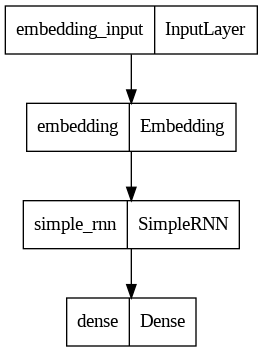

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(rnn, show_shapes=False, to_file='rnn_model.png')

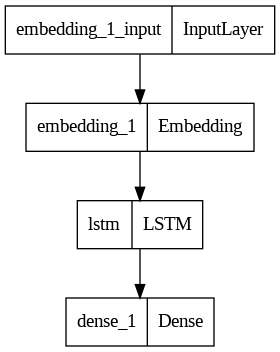

In [13]:
plot_model(lstm, show_shapes=False, to_file='lstm_model.png')

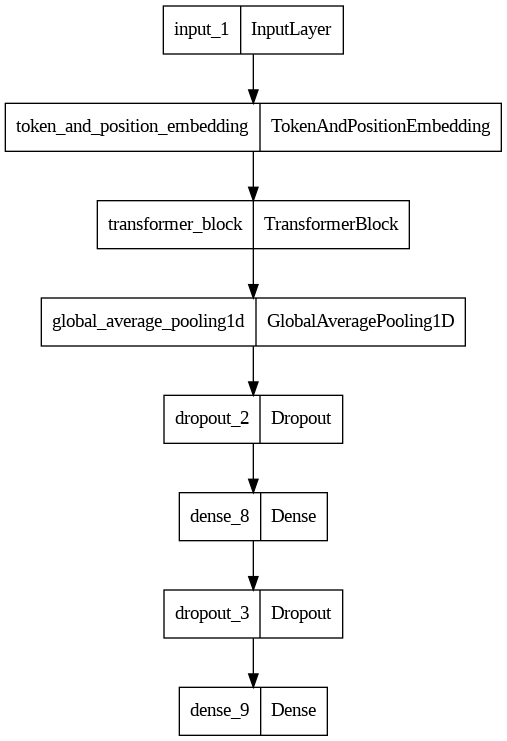

In [14]:
plot_model(selfAtt, show_shapes=False, to_file='selfAtt_model.png')

## 모델 평가

In [17]:
rnn_loaded_model = load_model('rnn_model.h5')
lstm_loaded_model = load_model('lstm_model.h5')

print("\n RNN Model 테스트 정확도: %.4f" % (rnn_loaded_model.evaluate(X_test, y_test)[1]))
print("\n LSTM Model 테스트 정확도: %.4f" % (lstm_loaded_model.evaluate(X_test, y_test)[1]))
print("Self Attention 테스트 정확도: %.4f" % (selfAtt.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 40s 50ms/step - loss: 0.4007 - acc: 0.8407

 RNN Model 테스트 정확도: 0.8407
782/782 [==============================] - 8s 10ms/step - loss: 0.3047 - acc: 0.8764

 LSTM Model 테스트 정확도: 0.8764
782/782 [==============================] - 6s 8ms/step - loss: 0.4111 - accuracy: 0.8642
Self Attention 테스트 정확도: 0.8642


## 모델 예측

In [18]:
test_input = "This movie was just way too overrated. The fighting was not professional and in slow motion. I was expecting more from a 200 million budget movie. The little sister of T.Challa was just trying too hard to be funny. The story was really dumb as well. Don't watch this movie if you are going because others say its great unless you are a Black Panther fan or Marvels fan."
print("===========================RNN model 예측===========================")
sentiment_predict(test_input, rnn_loaded_model)
print("===========================LSTM model 예측===========================")
sentiment_predict(test_input, lstm_loaded_model)
print("===========================트랜스포머 model 예측===========================")
sentiment_predict_att(test_input, selfAtt)

===========================RNN model 예측===========================
1/1 [==============================] - 0s 161ms/step
90.95% 확률로 긍정 리뷰입니다.
===========================LSTM model 예측===========================
1/1 [==============================] - 0s 362ms/step
93.65% 확률로 부정 리뷰입니다.
===========================트랜스포머 model 예측===========================


1/1 [==============================] - 0s 26ms/step
43.22% 확률로 긍정 리뷰입니다.
56.78% 확률로 부정 리뷰입니다.


In [23]:
# 긍정적인 리뷰
positive_review = "I watched this film last night and it was an amazing experience. \
The performances by the actors were top notch and the storyline was gripping. \
The cinematography was beautiful, it really transported me into the movie's world. \
I highly recommend this film to anyone who enjoys quality cinema."

# 부정적인 리뷰
negative_review = "I really wanted to like this movie but it just didn't hit the mark for me. \
The plot was full of holes and the character development was almost non-existent. \
Despite having a strong cast, the performances were lackluster due to the weak script. \
I wouldn't recommend wasting your time on this one."

print("======================== 긍정적인 리뷰 =============================")
print("===========================RNN model 예측===========================")
sentiment_predict(positive_review, rnn_loaded_model)
print("===========================LSTM model 예측===========================")
sentiment_predict(positive_review, lstm_loaded_model)
print("===========================트랜스포머 model 예측===========================")
sentiment_predict_att(positive_review, selfAtt)

print("======================== 부정적인 리뷰 =============================")
print("===========================RNN model 예측===========================")
sentiment_predict(negative_review, rnn_loaded_model)
print("===========================LSTM model 예측===========================")
sentiment_predict(negative_review, lstm_loaded_model)
print("===========================트랜스포머 model 예측===========================")
sentiment_predict_att(negative_review, selfAtt)

======================== 긍정적인 리뷰 =============================
===========================RNN model 예측===========================
1/1 [==============================] - 0s 97ms/step
96.70% 확률로 긍정 리뷰입니다.
===========================LSTM model 예측===========================
1/1 [==============================] - 0s 44ms/step
98.44% 확률로 긍정 리뷰입니다.
===========================트랜스포머 model 예측===========================
1/1 [==============================] - 0s 38ms/step
99.60% 확률로 긍정 리뷰입니다.
0.40% 확률로 부정 리뷰입니다.
======================== 부정적인 리뷰 =============================
===========================RNN model 예측===========================
1/1 [==============================] - 0s 92ms/step
92.79% 확률로 부정 리뷰입니다.
===========================LSTM model 예측===========================
1/1 [==============================] - 0s 38ms/step
97.79% 확률로 부정 리뷰입니다.
===========================트랜스포머 model 예측===========================
1/1 [==============================] - 0s 35ms/step
0.44% 확률로 긍정 리뷰입니다.
99.56% 확률